# Metric Comparisons

Compares:
- DeepSEA
- Epitome

Creates 4 heatmaps comparing AUC and PR results for DeepSEA and Epitome.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

In [2]:
epitome_output = '/home/eecs/akmorrow/epitome/out/Epitome'

deepSEA_output = '/home/eecs/akmorrow/epitome/out/DeepSEA'

plot_output = '/home/eecs/akmorrow/epitome/out/figures'

In [3]:
## Functions

def saveHeatmap(df, output_filepath, annot=False, cmap = 'coolwarm'):

    sns.heatmap(df, annot=annot, cmap = cmap)
    
    plt.savefig(output_filepath, bbox_inches = "tight")
    
def intersection(lst1, lst2): 
  
    # Use of hybrid method 
    temp = set(lst2) 
    lst3 = [value for value in lst1 if value in temp] 
    return lst3 
     

## AUC Comparisons

In [4]:
deepsea_av_auc = pd.read_csv(os.path.join(deepSEA_output, "DeepSEA_AVERAGE_AUC.csv"), sep="\t")

deepsea_auc = pd.read_csv(os.path.join(deepSEA_output, "DeepSEA_AUC.csv"), sep="\t")

epitome_auc = pd.read_csv(os.path.join(epitome_output, "Epitome_AUC.csv"), sep="\t")

epitome_auc.set_index('CellType', inplace=True)
deepsea_auc.set_index('CellType', inplace=True)
deepsea_av_auc.set_index('CellType', inplace=True)

In [5]:
### Heatmaps

c1 = list(deepsea_auc.columns)

c1.remove('Unnamed: 0')
c1.remove('DNase')
c1.remove('AUC_Average_Macro')
c1.remove('AUC_Average_Micro')


c2 = list(epitome_auc.columns)

c2.remove('Unnamed: 0')
c2.remove('AUC_Average_Macro')
c2.remove('AUC_Average_Micro')

def intersection(lst1, lst2): 
  
    # Use of hybrid method 
    temp = set(lst2) 
    lst3 = [value for value in lst1 if value in temp] 
    return lst3 
     
c_auc = intersection(c1,c2)



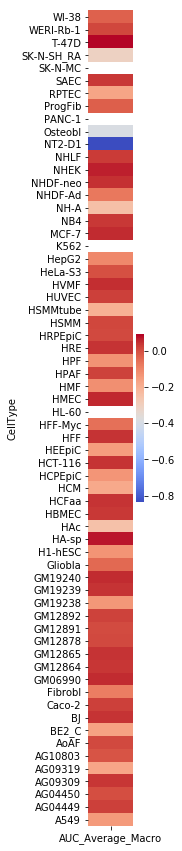

In [6]:
rcParams['figure.figsize'] = 1, 15

saveHeatmap(pd.DataFrame(epitome_auc['AUC_Average_Macro'] - deepsea_auc['AUC_Average_Macro']), 
           os.path.join(plot_output, 'AUC_macro_heatmap.pdf'))


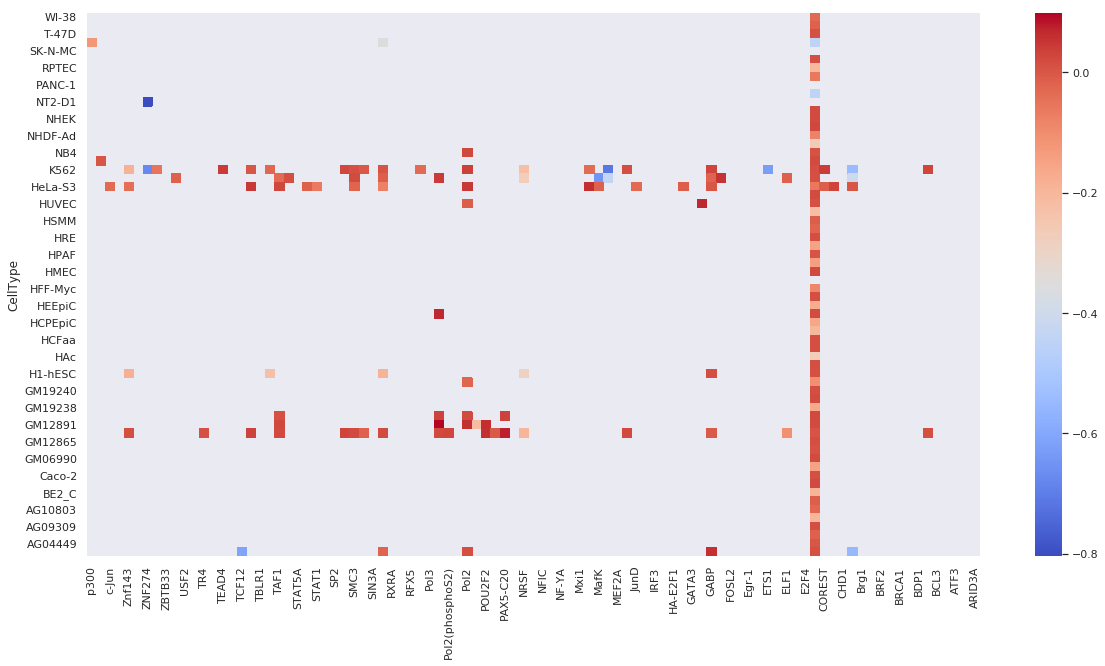

In [7]:
rcParams['figure.figsize'] = 20, 10
sns.set(font_scale=1)  
df = epitome_auc[c_auc] - deepsea_auc[c_auc]
saveHeatmap(df, 
           os.path.join(plot_output, 'AUC_TF_heatmap.pdf'))


## PR Comparisons

In [8]:
deepsea_pr = pd.read_csv(os.path.join(deepSEA_output, "DeepSEA_PR.csv"), sep="\t")

deepsea_av_pr = pd.read_csv(os.path.join(deepSEA_output, "DeepSEA_AVERAGE_PR.csv"), sep="\t")

epitome_pr = pd.read_csv(os.path.join(epitome_output, "Epitome_PR.csv"), sep="\t")

epitome_pr.set_index('CellType', inplace=True)
deepsea_pr.set_index('CellType', inplace=True)
deepsea_av_pr.set_index('CellType', inplace=True)

## Make heatmap

In [9]:

c1 = list(deepsea_pr.columns)

c1.remove('Unnamed: 0')
c1.remove('DNase')
c1.remove('PR_Average')


c2 = list(epitome_pr.columns)

c2.remove('Unnamed: 0')
c2.remove('PR_Average')


c_pr = intersection(c1,c2)



# Violin plot for PR values

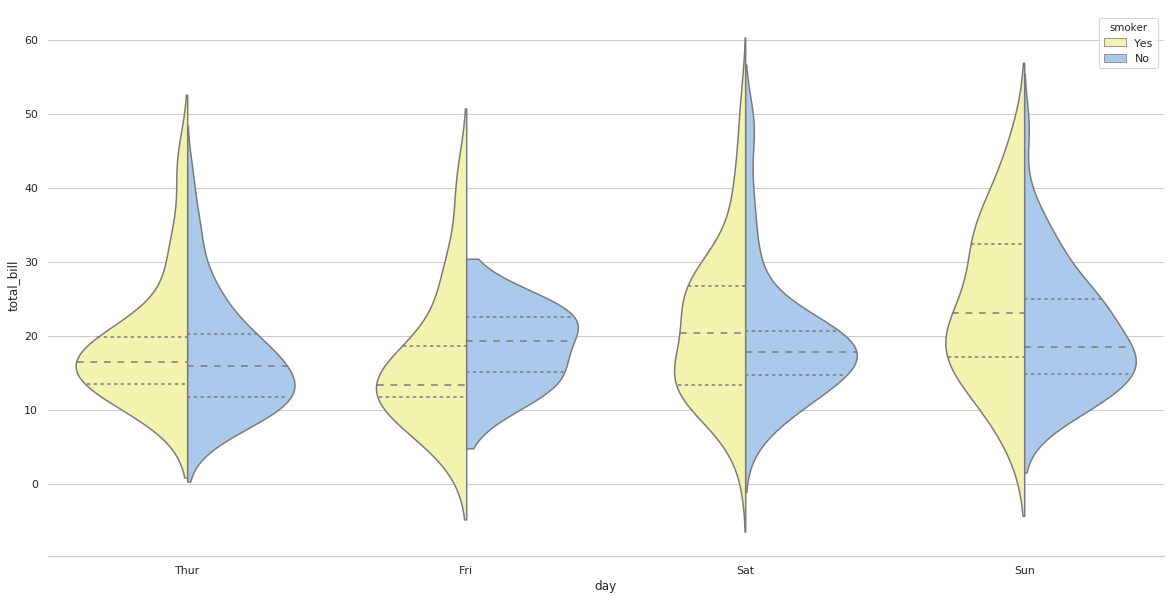

In [33]:

sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")
tips

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="smoker",
               split=True, inner="quart",
               palette={"Yes": "y", "No": "b"},
               data=tips)
sns.despine(left=True)

In [26]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                    'B': {0: 1, 1: 3, 2: 5},
                    'C': {0: 2, 1: 4, 2: 6}})

df


,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [34]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [32]:

df = pd.DataFrame({"DeepSEA_PR": deepsea_pr['PR_Average'],"Epitome_PR": epitome_pr['PR_Average'],
                  "DeepSEA_ROC": deepsea_auc['AUC_Average_Macro'],"Epitome_ROC": epitome_auc['AUC_Average_Macro']})
min(df["Epitome_PR"])

0.06273672188972736

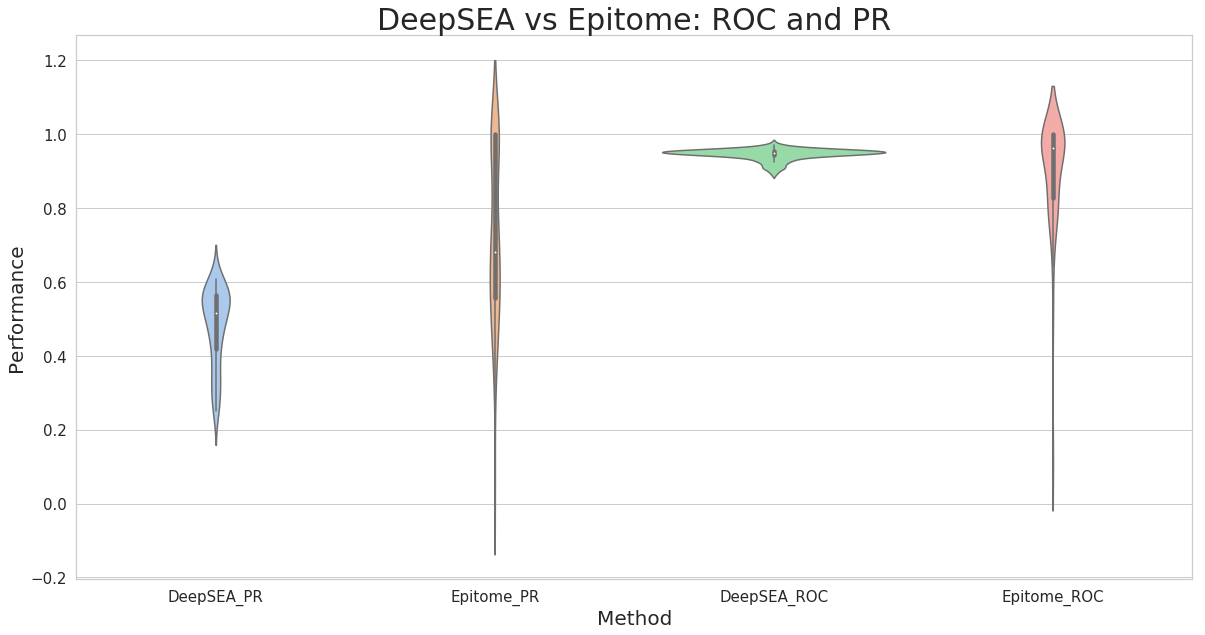

In [38]:

df = pd.DataFrame({"DeepSEA_PR": deepsea_pr['PR_Average'],"Epitome_PR": epitome_pr['PR_Average'],
                  "DeepSEA_ROC": deepsea_auc['AUC_Average_Macro'],"Epitome_ROC": epitome_auc['AUC_Average_Macro']})
df
melted = pd.melt(df, value_vars=["DeepSEA_PR","Epitome_PR","DeepSEA_ROC","Epitome_ROC"])
ax = sns.violinplot(x="variable", y="value", data=melted)

ax.axes.set_title("DeepSEA vs Epitome: ROC and PR",fontsize=30)
ax.set_xlabel("Method",fontsize=20)
ax.set_ylabel("Performance",fontsize=20)
ax.tick_params(labelsize=15)
# sns.plt.show()

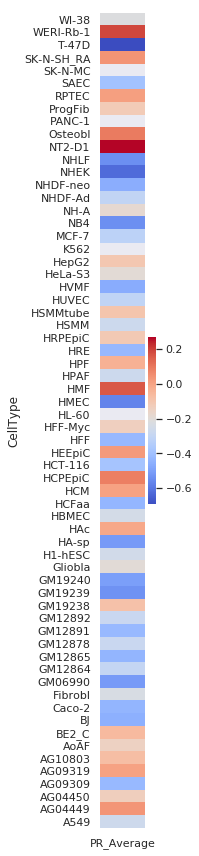

In [10]:
rcParams['figure.figsize'] = 1, 15
df = pd.DataFrame(deepsea_pr['PR_Average'] - epitome_pr['PR_Average'])

saveHeatmap(pd.DataFrame(df), 
           os.path.join(plot_output, 'PR_MACRO_heatmap.pdf'))


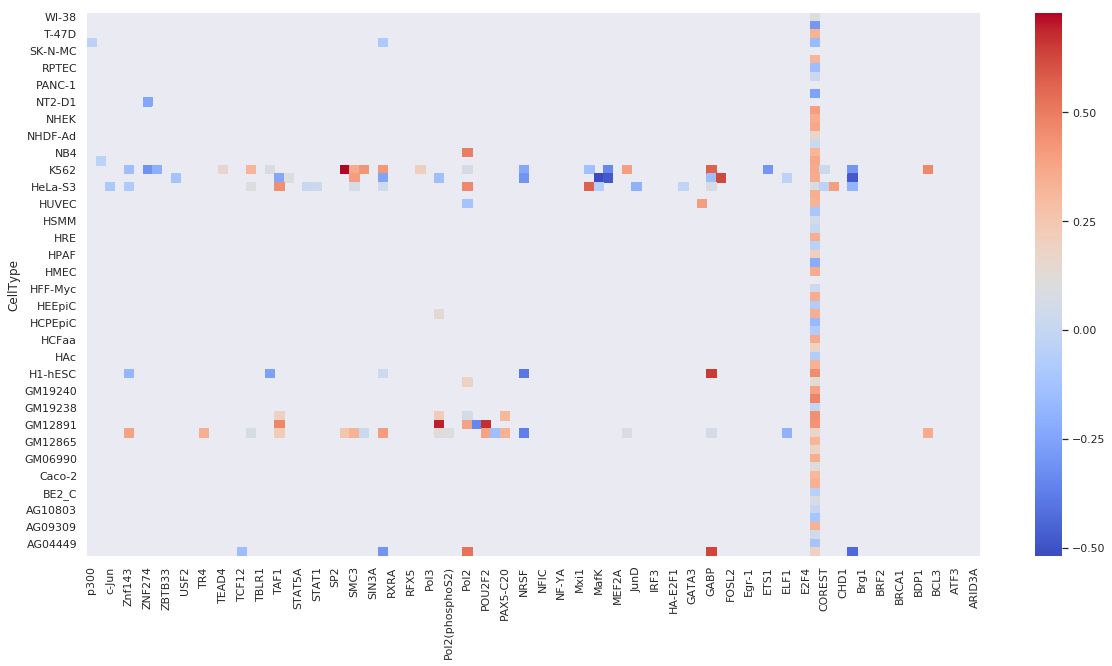

In [11]:
rcParams['figure.figsize'] = 20, 10
sns.set(font_scale=1)  
df = epitome_pr[c_pr] - deepsea_pr[c_pr]

saveHeatmap(df, 
           os.path.join(plot_output, 'PR_TF_heatmap.pdf'))


# Save meaned metrics to file

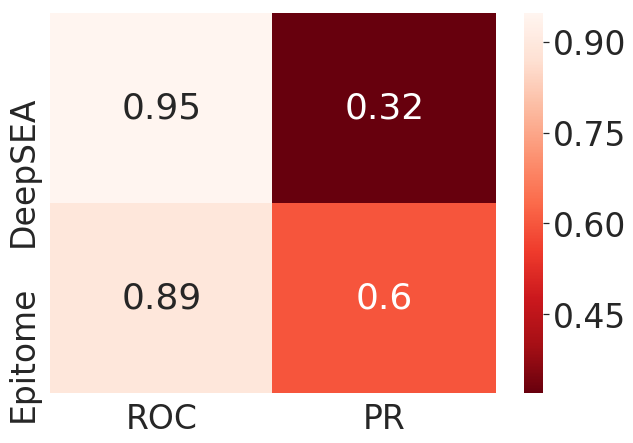

In [39]:
rcParams['figure.figsize'] = 10,7
a = np.nanmean(deepsea_auc[c_auc])
b = np.nanmean(deepsea_pr[c_pr])

c = np.nanmean(epitome_auc[c_auc])
d = np.nanmean(epitome_pr[c_pr])

arr = np.array([[a,b],[c,d]])

df = pd.DataFrame(arr, index=['DeepSEA', 'Epitome'], columns=['ROC', 'PR'])
sns.set(font_scale=3)  
saveHeatmap(df, 
           os.path.join(plot_output, 'PR_confusion_heatmap.pdf'), annot=True, cmap = "Reds_r")